**Завдання 1.**

In [13]:
import os
import shutil
import sys

def parse_args():
    import argparse

    parser = argparse.ArgumentParser(description="Копіює файли у вихідній директорії та сортує їх в піддиректоріях за розширенням.")
    parser.add_argument('src_dir', type=str, help='Шлях до вихідної директорії')
    parser.add_argument('dst_dir', type=str, nargs='?', default='dist', help='Шлях до директорії призначення (за замовчуванням: dist)')
    return parser.parse_args()

def copy_files(src_dir, dst_dir):
    try:
        for item in os.listdir(src_dir):
            src_path = os.path.join(src_dir, item)
            if os.path.isdir(src_path):
                copy_files(src_path, dst_dir)
            elif os.path.isfile(src_path):
                extension = os.path.splitext(item)[1][1:]  # Отримуємо розширення файлу без крапки
                if extension:  # Перевіряємо, що у файлу є розширення
                    dst_path = os.path.join(dst_dir, extension)
                    os.makedirs(dst_path, exist_ok=True)  # Створюємо директорію, якщо вона не існує
                    shutil.copy2(src_path, os.path.join(dst_path, item))
    except Exception as e:
        print(f"Помилка обробки {src_dir}: {e}")

def main():
    args = parse_args()
    src_dir = args.src_dir
    dst_dir = args.dst_dir

    if not os.path.exists(src_dir):
        print(f"Вихідна директорія '{src_dir}' не існує.")
        sys.exit(1)

    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    copy_files(src_dir, dst_dir)
    print(f"Файли скопійовано та відсортовано у {dst_dir}")

if __name__ == "__main__":
    main()



usage: colab_kernel_launcher.py [-h] src_dir [dst_dir]
colab_kernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

**Завдання 2.**

Введіть рівень рекурсії для сніжинки Коха: 4


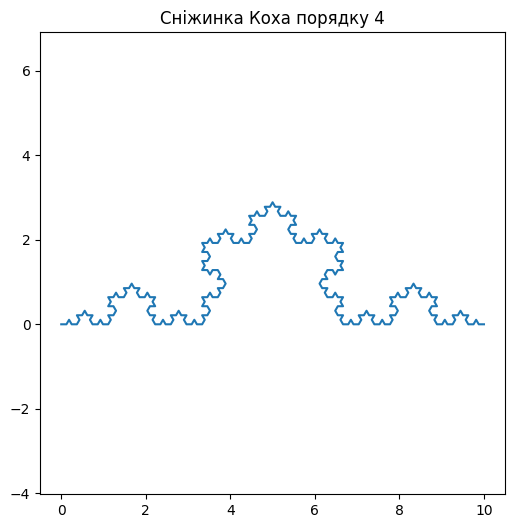

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, scale=10):
    if order == 0:
        # Прямий відрізок довжиною scale
        return [(0, 0), (scale, 0)]

    # Отримання сніжинки Коха попереднього порядку
    previous_level = koch_snowflake(order - 1, scale)

    # Перетворення кожного відрізка попереднього рівня
    new_points = []
    for (x1, y1), (x2, y2) in zip(previous_level[:-1], previous_level[1:]):
        # Визначення проміжних точок
        x_1_3 = x1 + (x2 - x1) / 3
        y_1_3 = y1 + (y2 - y1) / 3
        x_2_3 = x1 + 2 * (x2 - x1) / 3
        y_2_3 = y1 + 2 * (y2 - y1) / 3
        x_mid = (x1 + x2) / 2 - np.sqrt(3) * (y2 - y1) / 6
        y_mid = (y1 + y2) / 2 + np.sqrt(3) * (x2 - x1) / 6

        # Додавання нових точок
        new_points.extend([(x1, y1), (x_1_3, y_1_3), (x_mid, y_mid), (x_2_3, y_2_3)])
    new_points.append((x2, y2))  # Додавання останньої точки

    return new_points

def plot_koch_snowflake(order, scale=10):
    points = koch_snowflake(order, scale)
    x, y = zip(*points)

    plt.figure(figsize=(6, 6))
    plt.plot(x, y)
    plt.axis('equal')
    plt.title(f"Сніжинка Коха порядку {order}")
    plt.show()

# Введення рівня рекурсії
level = int(input("Введіть рівень рекурсії для сніжинки Коха: "))

# Малювання сніжинки Коха
plot_koch_snowflake(level)



**Завдання 3.**

In [15]:
def move_disk(n, source, target, auxiliary):
    if n == 1:
        print(f"Перемістити диск з {source} на {target}")
        towers[target].append(towers[source].pop())
        print_state()
    else:
        move_disk(n-1, source, auxiliary, target)
        move_disk(1, source, target, auxiliary)
        move_disk(n-1, auxiliary, target, source)

def print_state():
    print(f"Проміжний стан: {{'A': {towers['A']}, 'B': {towers['B']}, 'C': {towers['C']}}}")

def print_final_state():
    print(f"Кінцевий стан: {{'A': {towers['A']}, 'B': {towers['B']}, 'C': {towers['C']}}}")

# Вхідні дані
n = int(input("Введіть кількість дисків: "))

# Початковий стан стрижнів
towers = {'A': list(reversed(range(1, n+1))), 'B': [], 'C': []}
print("Початковий стан:")
print_state()

# Запуск алгоритму
move_disk(n, 'A', 'C', 'B')

# Виведення кінцевого стану
print_final_state()


Введіть кількість дисків: 4
Початковий стан:
Проміжний стан: {'A': [4, 3, 2, 1], 'B': [], 'C': []}
Перемістити диск з A на B
Проміжний стан: {'A': [4, 3, 2], 'B': [1], 'C': []}
Перемістити диск з A на C
Проміжний стан: {'A': [4, 3], 'B': [1], 'C': [2]}
Перемістити диск з B на C
Проміжний стан: {'A': [4, 3], 'B': [], 'C': [2, 1]}
Перемістити диск з A на B
Проміжний стан: {'A': [4], 'B': [3], 'C': [2, 1]}
Перемістити диск з C на A
Проміжний стан: {'A': [4, 1], 'B': [3], 'C': [2]}
Перемістити диск з C на B
Проміжний стан: {'A': [4, 1], 'B': [3, 2], 'C': []}
Перемістити диск з A на B
Проміжний стан: {'A': [4], 'B': [3, 2, 1], 'C': []}
Перемістити диск з A на C
Проміжний стан: {'A': [], 'B': [3, 2, 1], 'C': [4]}
Перемістити диск з B на C
Проміжний стан: {'A': [], 'B': [3, 2], 'C': [4, 1]}
Перемістити диск з B на A
Проміжний стан: {'A': [2], 'B': [3], 'C': [4, 1]}
Перемістити диск з C на A
Проміжний стан: {'A': [2, 1], 'B': [3], 'C': [4]}
Перемістити диск з B на C
Проміжний стан: {'A': [2, 1